# Customer Churn Analysis

#### Build a machine learning model to predict whether a customer will churn (leave)in the next month and identify the key factors influencing churn.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("telco_TS.csv")

In [53]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,State,StateNextMonth
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No Churn,No Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No Churn,No Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churn,No Churn
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No Churn,No Churn
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churn,Churn


In [54]:
df.shape

(7043, 22)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [56]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [58]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
State               0
StateNextMonth      0
dtype: int64

In [59]:
df.duplicated().sum()

np.int64(0)

In [60]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
State                object
StateNextMonth       object
dtype: object

In [61]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'State',
       'StateNextMonth'],
      dtype='object')

## Dataset Description
The dataset contains telecom customer information including demographics, service usage, billing details, and contract type.
The target variable is `StateNextMonth`, which indicates whether the customer churns in the next month.


- `State`: Current month customer status
- `StateNextMonth`: Whether the customer churns next month (target)

### Data Cleaning and Preparation¶

#### Drop ID

In [62]:
df.drop('customerID', axis=1, inplace=True)

" Purpose: customerID is just an identifier — it has no predictive value.

In [63]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'State', 'StateNextMonth'],
      dtype='object')

#### Encode Target (StateNextMonth)

In [64]:
df['StateNextMonth']= df['StateNextMonth'].map({'Churn':1, 'No Churn':0})

" Purpose: Convert target column into numeric so model can learn.

In [65]:
df['StateNextMonth'].unique()

array([0, 1])

### * EDA * 

#### $ Target   $ distribution 

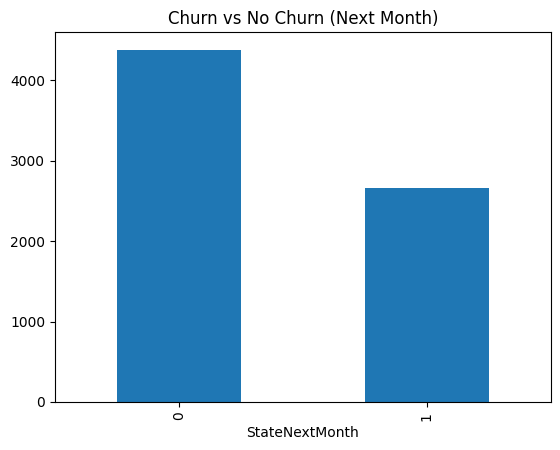

In [66]:
df['StateNextMonth'].value_counts().plot(kind='bar')
plt.title("Churn vs No Churn (Next Month)")
plt.show()

### Insight :
##### Most customers stay with the company, but many customers also leave next month. This shows that customer churn is an important problem to solve.


#### $ Contract $ vs   churn 

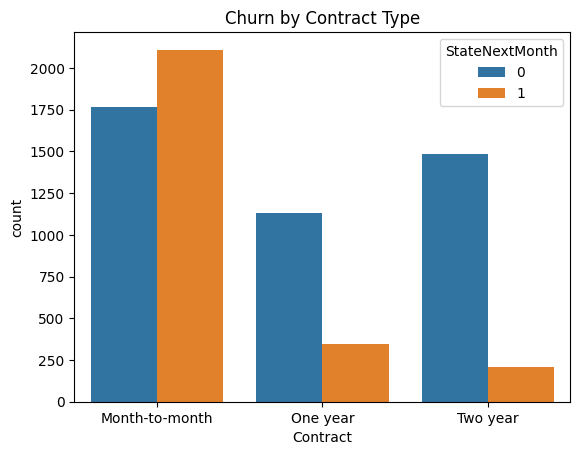

In [91]:
sns.countplot(data=df, x='Contract', hue='StateNextMonth')
plt.title("Churn by Contract Type")
plt.show()

#### Insight : 
##### Customers with month-to-month contracts churn much more than customers with one-year or two-year contracts.

### $ Charges $ vs churn 

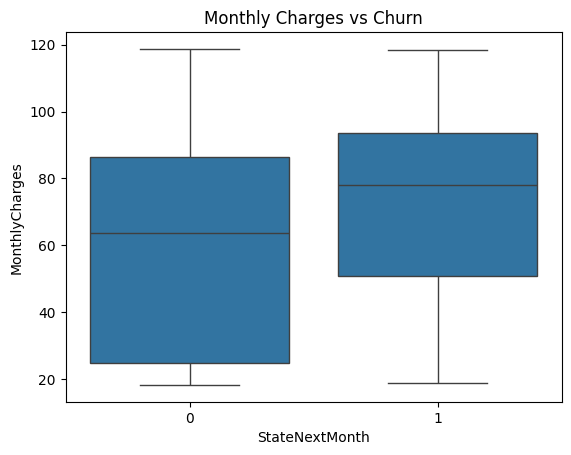

In [92]:
sns.boxplot(data=df, x='StateNextMonth', y='MonthlyCharges')
plt.title("Monthly Charges vs Churn")
plt.show()

### Insight :
##### Customers who churn tend to have slightly higher monthly charges.

#### $ Tenure  $ vs  churn

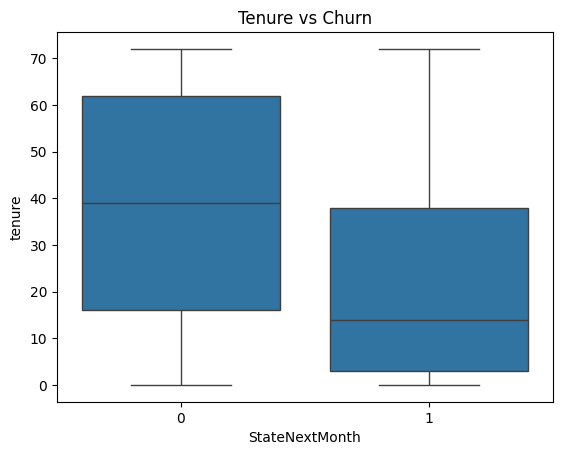

In [93]:
sns.boxplot(data=df, x='StateNextMonth', y='tenure')
plt.title("Tenure vs Churn")
plt.show()

#### Insight : Customers with lower tenure are more likely to churn.


#### Encode categorical features

In [70]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [71]:
df_encoded.dtypes

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
StateNextMonth                             int64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes     

In [72]:
df_encoded.shape

(7043, 32)

In [73]:
df_encoded.columns    

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'StateNextMonth', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'State_No Churn'],
      dtype='object')

#### * Split *

In [74]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('StateNextMonth', axis=1)
y = df_encoded['StateNextMonth']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [75]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (5634, 31)
X_test: (1409, 31)
y_train: (5634,)
y_test: (1409,)


In [76]:
len(X_train) + len(X_test) == len(X)

True

#### Scale

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:" , X_test_scaled.shape)

X_train_scaled: (5634, 31)
X_test_scaled: (1409, 31)


#### Train Model

In [82]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

In [83]:
model.coef_

array([[-0.05494295, -0.24757791,  0.02406915,  0.12997512,  0.04569884,
        -0.05515956,  0.02851972, -0.00430961,  0.00430961,  0.06815128,
         0.09640294, -0.02210002, -0.02210002, -0.16730529, -0.02210002,
        -0.04858285, -0.02210002,  0.00728504, -0.02210002, -0.15630601,
        -0.02210002,  0.08419544, -0.02210002, -0.02284836, -0.15862781,
        -0.24835101,  0.04208205,  0.05620731,  0.11547474,  0.04577488,
        -1.45180357]])

In [84]:
model.intercept_

array([-0.49548338])

#### Make Predictions

In [85]:
y_pred = model.predict(X_test_scaled)   

In [86]:
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

#### Evaluate Model

In [87]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[867  35]
 [169 338]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       902
           1       0.91      0.67      0.77       507

    accuracy                           0.86      1409
   macro avg       0.87      0.81      0.83      1409
weighted avg       0.86      0.86      0.85      1409



### ROC and AUC

In [89]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
print("ROC AUC:", roc_score)

ROC AUC: 0.8727045312411166


### Feature Importance

In [90]:
features = X.columns
coefficients = model.coef_[0]

importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

importance_df.head(10)

,Feature,Coefficient
3,TotalCharges,0.129975
28,PaymentMethod_Electronic check,0.115475
10,InternetService_Fiber optic,0.096403
21,StreamingTV_Yes,0.084195
9,MultipleLines_Yes,0.068151
27,PaymentMethod_Credit card (automatic),0.056207
29,PaymentMethod_Mailed check,0.045775
4,gender_Male,0.045699
26,PaperlessBilling_Yes,0.042082
6,Dependents_Yes,0.028520


##### * Key Insight : 
##### Customers with fiber internet, electronic payment, and high bills leave more.
##### Customers with family and long-term plans stay longer.

### Business Recommendations

##### Offer loyalty benefits for high-risk customers.
##### Encourage customers to move to long-term contracts.
##### Review pricing and service quality for fiber users.

### Final Conclusion

##### This analysis shows that customers who are new, pay higher monthly charges, and are on month-to-month contracts are more likely to churn. By focusing on these customers with better offers, support, and long-term plans, the company can reduce churn and keep more customers.